<a href="https://colab.research.google.com/github/akmalhaqii/Tugas-Akhir-Pengantar-Sistem-Informasi/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Setup Dataset Kaggle*
Source: https://youtu.be/sv3tBqsieGE?si=noE0_GWIU0_NUxuK

In [1]:
!pip install -q kaggle

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle competitions download -c freepass-data-science-open-recruitment-bcc-2026

100% 1.39G/1.39G [00:18<00:00, 176MB/s]
100% 1.39G/1.39G [00:18<00:00, 82.2MB/s]


In [8]:
!unzip freepass-data-science-open-recruitment-bcc-2026.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/test/images/2015_06540.jpg  
  inflating: /content/test/images/2015_06541.jpg  
  inflating: /content/test/images/2015_06542.jpg  
  inflating: /content/test/images/2015_06545.jpg  
  inflating: /content/test/images/2015_06547.jpg  
  inflating: /content/test/images/2015_06548.jpg  
  inflating: /content/test/images/2015_06549.jpg  
  inflating: /content/test/images/2015_06550.jpg  
  inflating: /content/test/images/2015_06554.jpg  
  inflating: /content/test/images/2015_06555.jpg  
  inflating: /content/test/images/2015_06557.jpg  
  inflating: /content/test/images/2015_06558.jpg  
  inflating: /content/test/images/2015_06559.jpg  
  inflating: /content/test/images/2015_06560.jpg  
  inflating: /content/test/images/2015_06561.jpg  
  inflating: /content/test/images/2015_06565.jpg  
  inflating: /content/test/images/2015_06566.jpg  
  inflating: /content/test/images/2015_06567.jpg  
  inflating: /content/test/imag

In [9]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.9 MB/s eta 0:00:00


# *Data Split*
---

Karna belum ada dataset val jadi kita pakai metode split data random dengan komposisi 80% untuk train dan 20% untuk validation


In [10]:
import os
import random
import shutil


TRAIN_IMG_DIR = "/content/datasets/train/images"
TRAIN_ANN_DIR = "/content/datasets/train/annotations"

VAL_IMG_DIR = "/content/datasets/val/images"
VAL_ANN_DIR = "/content/datasets/val/annotations"

VAL_RATIO = 0.2
SEED = 42

random.seed(SEED)

os.makedirs(VAL_IMG_DIR, exist_ok=True)
os.makedirs(VAL_ANN_DIR, exist_ok=True)

images = [f for f in os.listdir(TRAIN_IMG_DIR)
          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"Total images: {len(images)}")

random.shuffle(images)
val_count = int(len(images) * VAL_RATIO)
val_images = images[:val_count]

print(f"Move to val: {len(val_images)} images")

for img_name in val_images:
    base_name = os.path.splitext(img_name)[0]

    img_src = os.path.join(TRAIN_IMG_DIR, img_name)
    ann_src = os.path.join(TRAIN_ANN_DIR, base_name + ".txt")

    img_dst = os.path.join(VAL_IMG_DIR, img_name)
    ann_dst = os.path.join(VAL_ANN_DIR, base_name + ".txt")

    shutil.move(img_src, img_dst)

    if os.path.exists(ann_src):
        shutil.move(ann_src, ann_dst)
    else:
        print(f"Annotation not found for {img_name}")

print("Done ga bang, donee")


Total images: 2208
Move to val: 441 images
Annotation not found for 2015_07342.png
Annotation not found for 2015_01011.jpg
Annotation not found for 2015_01965.jpg
Annotation not found for 2015_06396.jpg
Annotation not found for 2015_06478.jpg
Annotation not found for 2015_04776.jpg
Annotation not found for 2015_04482.jpg
Annotation not found for 2015_06830.png
Annotation not found for 2015_01862.png
Annotation not found for 2015_02717.jpg
Annotation not found for 2015_06205.png
Annotation not found for 2015_00461.jpg
Annotation not found for 2015_00973.jpg
Annotation not found for 2015_06219.png
Annotation not found for 2015_03308.jpg
Annotation not found for 2015_03389.jpg
Annotation not found for 2015_06006.jpg
Annotation not found for 2015_04058.jpg
Annotation not found for 2015_06165.jpg
Annotation not found for 2015_05140.jpg
Annotation not found for 2015_01140.jpg
Annotation not found for 2015_05504.JPEG
Annotation not found for 2015_04329.jpg
Annotation not found for 2015_04177.

**Cukup tau**


---


Fun fact ternyata data anotasi tidak ada yang kepindah, jadi troubleshoot dulu and ternyata masalahnya ada di format ext dimana data anotasi keikut ext nya si gambar (ex: xxx.png.txt), sedangkan dalam program hanya memindah berdasarkan base nama tanpa ext, jadi diputuskan untuk rename dulu semua data di train biar di akhir tidak ada duplikasi maupun missing

In [11]:
import os

ANN_DIR = "/content/datasets/train/annotations"

files = os.listdir(ANN_DIR)

renamed = 0
skipped = 0

for f in files:
    if not f.endswith(".txt"):
        continue

    if f.endswith((".png.txt", ".jpg.txt", ".jpeg.txt")):
        new_name = (
            f.replace(".png.txt", ".txt")
             .replace(".jpg.txt", ".txt")
             .replace(".jpeg.txt", ".txt")
        )

        src = os.path.join(ANN_DIR, f)
        dst = os.path.join(ANN_DIR, new_name)

        if os.path.exists(dst):
            print(f"⏭️ Skip (exists): {new_name}")
            skipped += 1
        else:
            os.rename(src, dst)
            renamed += 1

print(f"Rename pun rampung | Renamed: {renamed}, Skipped: {skipped}")


Rename pun rampung | Renamed: 2028, Skipped: 0


**Cukup Tau**


---

Rename selesai tahapan selanjutnya move ke directory baru di validasi

In [12]:
import os
import shutil

VAL_IMG_DIR = "/content/datasets/val/images"
TRAIN_ANN_DIR = "/content/datasets/train/annotations"
VAL_ANN_DIR = "/content/datasets/val/annotations"

os.makedirs(VAL_ANN_DIR, exist_ok=True)

images = [f for f in os.listdir(VAL_IMG_DIR)
          if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

print(f"Found {len(images)} val images")

moved = 0
missing = 0

for img_name in images:
    base = os.path.splitext(img_name)[0]
    ann_name = base + ".txt"

    ann_src = os.path.join(TRAIN_ANN_DIR, ann_name)
    ann_dst = os.path.join(VAL_ANN_DIR, ann_name)

    if os.path.exists(ann_src):
        shutil.move(ann_src, ann_dst)
        moved += 1
    else:
        print(f"Annotation ndak ono: {ann_name}")
        missing += 1

print(f"Sampun nggih | Moved: {moved}, Missing: {missing}")


Found 441 val images
Annotation ndak ono: 2015_05509.txt
Annotation ndak ono: 2015_04177.txt
Annotation ndak ono: 2015_01156.txt
Annotation ndak ono: 2015_07156.txt
Annotation ndak ono: 2015_06646.txt
Annotation ndak ono: 2015_06692.txt
Annotation ndak ono: 2015_06040.txt
Annotation ndak ono: 2015_02658.txt
Annotation ndak ono: 2015_05493.txt
Annotation ndak ono: 2015_01192.txt
Annotation ndak ono: 2015_02352.txt
Annotation ndak ono: 2015_05504.txt
Annotation ndak ono: 2015_02290.txt
Annotation ndak ono: 2015_04839.txt
Annotation ndak ono: 2015_04842.txt
Annotation ndak ono: 2015_02254.txt
Annotation ndak ono: 2015_04847.txt
Annotation ndak ono: 2015_04304.txt
Annotation ndak ono: 2015_06061.txt
Annotation ndak ono: 2015_02652.txt
Annotation ndak ono: 2015_06148.txt
Annotation ndak ono: 2015_00593.txt
Annotation ndak ono: 2015_04298.txt
Annotation ndak ono: 2015_07274.txt
Annotation ndak ono: 2015_04695.txt
Sampun nggih | Moved: 416, Missing: 25


**Cukup Tau**


---

Setelah di cek, hasil debug masih ada yang missing sebanyak 25 anotasi, karna seharusnya di komposisi yang sebelumnya itu pasti sama dalam artian tidak ada gambar dengan tanpa data anotasi

*hasil data overview sebelumnya
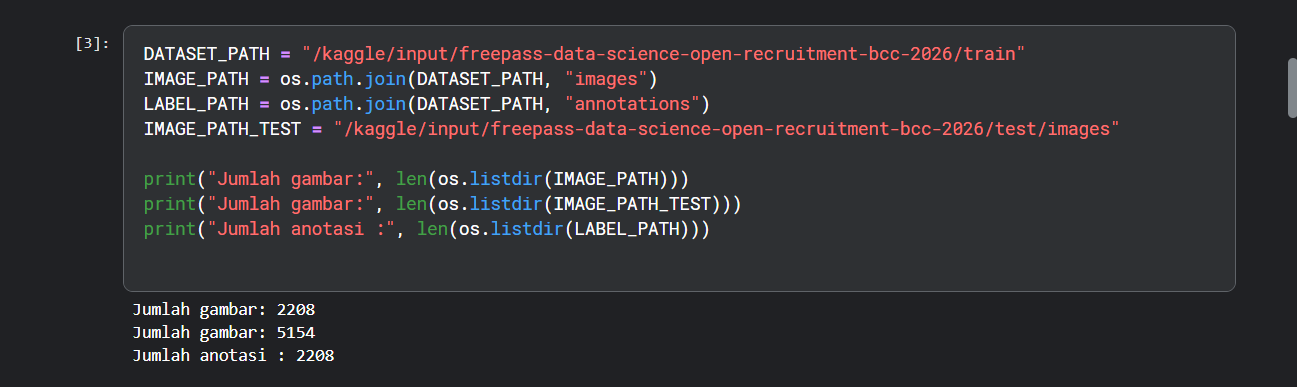



In [15]:
x=len(os.listdir(VAL_IMG_DIR))
y=len(os.listdir(VAL_ANN_DIR))

print("VAL images:", x)
print("VAL annotations:", y)

if y==x:
  print("aman")
else:
  print("gak pas")


VAL images: 441
VAL annotations: 416
gak pas


In [16]:
import os

VAL_IMG_DIR = "/content/datasets/val/images"
VAL_ANN_DIR = "/content/datasets/val/annotations"
TRAIN_ANN_DIR = "/content/datasets/train/annotations"

val_images = {os.path.splitext(f)[0] for f in os.listdir(VAL_IMG_DIR)
              if f.lower().endswith(('.jpg','.jpeg','.png'))}

val_annotations = {os.path.splitext(f)[0] for f in os.listdir(VAL_ANN_DIR)
                   if f.endswith(".txt")}

train_annotations = {os.path.splitext(f)[0] for f in os.listdir(TRAIN_ANN_DIR)
                     if f.endswith(".txt")}

print("VAL images:", len(val_images))
print("VAL annotations:", len(val_annotations))

print("\n image yes, anotasi no:")
print(list(val_images - val_annotations)[:10])

print("\nanotasi yes, img no:")
print(list(val_annotations - val_images)[:10])


VAL images: 441
VAL annotations: 416

 image yes, anotasi no:
['2015_01192', '2015_04298', '2015_04847', '2015_04695', '2015_00593', '2015_06646', '2015_02254', '2015_04842', '2015_05509', '2015_05493']

anotasi yes, img no:
[]


In [17]:
#debug anotasi ilangg
import os

TRAIN_ANN_DIR = "/content/datasets/train/annotations"

missing_bases = [
    '2015_01192', '2015_04298', '2015_04847', '2015_04695',
    '2015_00593', '2015_06646', '2015_02254',
    '2015_04842', '2015_05509', '2015_05493'
]

all_anns = os.listdir(TRAIN_ANN_DIR)

for base in missing_bases:
    x = [f for f in all_anns if base in f]
    print(f"{base} ama {x}")


2015_01192 ama ['2015_01192.JPEG.txt']
2015_04298 ama ['2015_04298.JPEG.txt']
2015_04847 ama ['2015_04847.JPEG.txt']
2015_04695 ama ['2015_04695.JPEG.txt']
2015_00593 ama ['2015_00593.JPEG.txt']
2015_06646 ama ['2015_06646.JPEG.txt']
2015_02254 ama ['2015_02254.JPG.txt']
2015_04842 ama ['2015_04842.JPEG.txt']
2015_05509 ama ['2015_05509.JPEG.txt']
2015_05493 ama ['2015_05493.JPEG.txt']


In [19]:
import os

ANN_DIR = "/content/datasets/train/annotations"

files = os.listdir(ANN_DIR)

renamed = 0
skipped = 0

for f in files:
    for ext in [".JPG.txt", ".JPEG.txt"]:
        if f.endswith(ext):
            base = f[:-len(ext)]
            new_name = base + ".txt"

            src = os.path.join(ANN_DIR, f)
            dst = os.path.join(ANN_DIR, new_name)

            if os.path.exists(dst):
                print(f"Skip (udh ada): {new_name}")
                skipped += 1
            else:
                os.rename(src, dst)
                renamed += 1
            break

print(f"sampun | renamed={renamed}, skipped={skipped}")

sampun | renamed=180, skipped=0


In [20]:
import os
import shutil

VAL_IMG_DIR = "/content/datasets/val/images"
VAL_ANN_DIR = "/content/datasets/val/annotations"
TRAIN_ANN_DIR = "/content/datasets/train/annotations"

os.makedirs(VAL_ANN_DIR, exist_ok=True)

val_images = [f for f in os.listdir(VAL_IMG_DIR)
              if f.lower().endswith(('.jpg','.jpeg','.png'))]

val_anns = set(
    os.path.splitext(f)[0]
    for f in os.listdir(VAL_ANN_DIR)
    if f.endswith(".txt")
)

moved = 0
missing = 0

for img in val_images:
    base = os.path.splitext(img)[0]
    ann_name = base + ".txt"

    if base not in val_anns:
        src = os.path.join(TRAIN_ANN_DIR, ann_name)
        dst = os.path.join(VAL_ANN_DIR, ann_name)

        if os.path.exists(src):
            shutil.move(src, dst)
            moved += 1
        else:
            print(f"ndak ono anotasi: {ann_name}")
            missing += 1

print(f"\nfinallyy punn | moved={moved}, still missing={missing}")



finallyy punn | moved=25, still missing=0


In [21]:
x=len(os.listdir(VAL_IMG_DIR))
y=len(os.listdir(VAL_ANN_DIR))

print("VAL images:", x)
print("VAL annotations:", y)

if y==x:
  print("aman")
else:
  print("gak pas")

VAL images: 441
VAL annotations: 441
aman


In [ ]:
from ultralytics import YOLO
model = YOLO("yolo26n.pt")

model.train(
    data="/content/datasets/data.yaml",
    epochs=20,
    imgsz=640
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (AMD EPYC 7B12)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=